[View in Colaboratory](https://colab.research.google.com/github/tgi25/home/blob/master/AutoEncoder_01.ipynb)

### Loading the MNIST dataset

In [1]:
from keras.datasets import mnist #importing the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print "x_train shape = ", x_train.shape, "y_train shape = ", y_train.shape
print "x_test shape = ", x_test.shape, "y_test shape = ", y_test.shape

Using TensorFlow backend.


11501568/11490434 [==============================] - 1s 0us/step
x_train shape =  (60000, 28, 28) y_train shape =  (60000,)
x_test shape =  (10000, 28, 28) y_test shape =  (10000,)


### Casting inputs to float32

In [0]:
x_train = x_train.astype('float32')
x_test  = x_test.astype('float32')

### Reshaping inputs

In [3]:
INPUT_DIM = 784 #28 by 28

x_train_reshape = x_train.reshape(60000, INPUT_DIM)
x_test_reshape = x_test.reshape(10000, INPUT_DIM)
print x_train.shape, "=>", x_train_reshape.shape
print x_test.shape,  "=>", x_test_reshape.shape

(60000, 28, 28) => (60000, 784)
(10000, 28, 28) => (10000, 784)


### Normalizing the inputs

In [0]:
x_train_reshape /= 255
x_test_reshape  /= 255

### Building the Autoencoder model

In [5]:
from keras.models import Sequential
from keras.layers import Dense, Activation

ENCODING_DIM = 32
autoencoder = Sequential()
autoencoder.add(Dense(ENCODING_DIM, activation='relu', input_shape=(INPUT_DIM,)))
autoencoder.add(Dense(INPUT_DIM, activation='sigmoid'))
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_2 (Dense)              (None, 784)               25872     
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


### Compiling the model

In [0]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy', metrics=['accuracy'])

### Fitting the Autoencoder

In [7]:
autoencoder_history = autoencoder.fit(x=x_train_reshape, y=x_train_reshape,
                                     epochs=100, batch_size=256,
                                     shuffle=True,
                                     validation_data=(x_test_reshape, x_test_reshape),
                                     verbose=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 3s 46us/step - loss: 0.3535 - acc: 0.7561 - val_loss: 0.2695 - val_acc: 0.7948
Epoch 2/100
60000/60000 [==============================] - 2s 29us/step - loss: 0.2606 - acc: 0.7977 - val_loss: 0.2478 - val_acc: 0.7975
Epoch 3/100
60000/60000 [==============================] - 2s 29us/step - loss: 0.2373 - acc: 0.7971 - val_loss: 0.2251 - val_acc: 0.7951
Epoch 4/100
60000/60000 [==============================] - 2s 29us/step - loss: 0.2182 - acc: 0.7972 - val_loss: 0.2089 - val_acc: 0.7974
Epoch 5/100
60000/60000 [==============================] - 2s 29us/step - loss: 0.2039 - acc: 0.7987 - val_loss: 0.1964 - val_acc: 0.7985
Epoch 6/100
60000/60000 [==============================] - 2s 29us/step - loss: 0.1934 - acc: 0.7999 - val_loss: 0.1876 - val_acc: 0.8005
Epoch 7/100
 8192/60000 [===>..........................] - ETA: 1s - loss: 0.1889 - acc: 0.8000

60000/60000 [==============================] - 2s 29us/step - loss: 0.1853 - acc: 0.8011 - val_loss: 0.1803 - val_acc: 0.8011
Epoch 8/100
60000/60000 [==============================] - 2s 30us/step - loss: 0.1787 - acc: 0.8022 - val_loss: 0.1743 - val_acc: 0.8026
Epoch 9/100
60000/60000 [==============================] - 2s 29us/step - loss: 0.1730 - acc: 0.8032 - val_loss: 0.1692 - val_acc: 0.8035
Epoch 10/100
60000/60000 [==============================] - 2s 29us/step - loss: 0.1680 - acc: 0.8041 - val_loss: 0.1643 - val_acc: 0.8039
Epoch 11/100
60000/60000 [==============================] - 2s 29us/step - loss: 0.1635 - acc: 0.8048 - val_loss: 0.1601 - val_acc: 0.8049
Epoch 12/100
60000/60000 [==============================] - 2s 29us/step - loss: 0.1594 - acc: 0.8056 - val_loss: 0.1561 - val_acc: 0.8054
Epoch 13/100
30208/60000 [==============>...............] - ETA: 0s - loss: 0.1563 - acc: 0.8058

60000/60000 [==============================] - 2s 30us/step - loss: 0.1556 - acc: 0.8062 - val_loss: 0.1524 - val_acc: 0.8060
Epoch 14/100
60000/60000 [==============================] - 2s 28us/step - loss: 0.1519 - acc: 0.8068 - val_loss: 0.1488 - val_acc: 0.8065
Epoch 15/100
60000/60000 [==============================] - 2s 29us/step - loss: 0.1486 - acc: 0.8074 - val_loss: 0.1455 - val_acc: 0.8068
Epoch 16/100
60000/60000 [==============================] - 2s 29us/step - loss: 0.1454 - acc: 0.8079 - val_loss: 0.1424 - val_acc: 0.8074
Epoch 17/100
60000/60000 [==============================] - 2s 28us/step - loss: 0.1424 - acc: 0.8084 - val_loss: 0.1395 - val_acc: 0.8080
Epoch 18/100
60000/60000 [==============================] - 2s 28us/step - loss: 0.1396 - acc: 0.8089 - val_loss: 0.1367 - val_acc: 0.8082
Epoch 19/100
38656/60000 [==================>...........] - ETA: 0s - loss: 0.1376 - acc: 0.8091

60000/60000 [==============================] - 2s 28us/step - loss: 0.1369 - acc: 0.8093 - val_loss: 0.1341 - val_acc: 0.8087
Epoch 20/100
60000/60000 [==============================] - 2s 29us/step - loss: 0.1344 - acc: 0.8097 - val_loss: 0.1316 - val_acc: 0.8090
Epoch 21/100
60000/60000 [==============================] - 2s 28us/step - loss: 0.1320 - acc: 0.8100 - val_loss: 0.1293 - val_acc: 0.8094
Epoch 22/100
60000/60000 [==============================] - 2s 29us/step - loss: 0.1298 - acc: 0.8104 - val_loss: 0.1271 - val_acc: 0.8098
Epoch 23/100
60000/60000 [==============================] - 2s 29us/step - loss: 0.1276 - acc: 0.8107 - val_loss: 0.1250 - val_acc: 0.8101
Epoch 24/100
60000/60000 [==============================] - 2s 29us/step - loss: 0.1256 - acc: 0.8110 - val_loss: 0.1231 - val_acc: 0.8104
Epoch 25/100
38144/60000 [==================>...........] - ETA: 0s - loss: 0.1238 - acc: 0.8115

60000/60000 [==============================] - 2s 28us/step - loss: 0.1237 - acc: 0.8113 - val_loss: 0.1211 - val_acc: 0.8106
Epoch 26/100
60000/60000 [==============================] - 2s 29us/step - loss: 0.1219 - acc: 0.8115 - val_loss: 0.1194 - val_acc: 0.8108
Epoch 27/100
60000/60000 [==============================] - 2s 28us/step - loss: 0.1202 - acc: 0.8117 - val_loss: 0.1178 - val_acc: 0.8110
Epoch 28/100
60000/60000 [==============================] - 2s 28us/step - loss: 0.1186 - acc: 0.8119 - val_loss: 0.1163 - val_acc: 0.8112
Epoch 29/100
60000/60000 [==============================] - 2s 28us/step - loss: 0.1172 - acc: 0.8121 - val_loss: 0.1149 - val_acc: 0.8113
Epoch 30/100
60000/60000 [==============================] - 2s 27us/step - loss: 0.1159 - acc: 0.8123 - val_loss: 0.1136 - val_acc: 0.8115
Epoch 31/100
45312/60000 [=====================>........] - ETA: 0s - loss: 0.1150 - acc: 0.8121

60000/60000 [==============================] - 2s 27us/step - loss: 0.1147 - acc: 0.8124 - val_loss: 0.1125 - val_acc: 0.8116
Epoch 32/100
60000/60000 [==============================] - 2s 27us/step - loss: 0.1136 - acc: 0.8125 - val_loss: 0.1114 - val_acc: 0.8118
Epoch 33/100
60000/60000 [==============================] - 2s 27us/step - loss: 0.1126 - acc: 0.8126 - val_loss: 0.1105 - val_acc: 0.8119
Epoch 34/100
60000/60000 [==============================] - 2s 28us/step - loss: 0.1116 - acc: 0.8127 - val_loss: 0.1096 - val_acc: 0.8119
Epoch 35/100
60000/60000 [==============================] - 2s 27us/step - loss: 0.1107 - acc: 0.8128 - val_loss: 0.1087 - val_acc: 0.8120
Epoch 36/100
60000/60000 [==============================] - 2s 28us/step - loss: 0.1100 - acc: 0.8129 - val_loss: 0.1079 - val_acc: 0.8121
Epoch 37/100
45056/60000 [=====================>........] - ETA: 0s - loss: 0.1093 - acc: 0.8129

60000/60000 [==============================] - 2s 28us/step - loss: 0.1092 - acc: 0.8130 - val_loss: 0.1072 - val_acc: 0.8121
Epoch 38/100
60000/60000 [==============================] - 2s 28us/step - loss: 0.1085 - acc: 0.8130 - val_loss: 0.1066 - val_acc: 0.8122
Epoch 39/100
60000/60000 [==============================] - 2s 28us/step - loss: 0.1079 - acc: 0.8131 - val_loss: 0.1060 - val_acc: 0.8123
Epoch 40/100
60000/60000 [==============================] - 2s 28us/step - loss: 0.1073 - acc: 0.8131 - val_loss: 0.1054 - val_acc: 0.8123
Epoch 41/100
60000/60000 [==============================] - 2s 27us/step - loss: 0.1067 - acc: 0.8132 - val_loss: 0.1048 - val_acc: 0.8123
Epoch 42/100
60000/60000 [==============================] - 2s 28us/step - loss: 0.1062 - acc: 0.8132 - val_loss: 0.1043 - val_acc: 0.8124
Epoch 43/100
43264/60000 [====================>.........] - ETA: 0s - loss: 0.1056 - acc: 0.8133

60000/60000 [==============================] - 2s 28us/step - loss: 0.1056 - acc: 0.8133 - val_loss: 0.1038 - val_acc: 0.8125
Epoch 44/100
60000/60000 [==============================] - 2s 27us/step - loss: 0.1052 - acc: 0.8133 - val_loss: 0.1033 - val_acc: 0.8125
Epoch 45/100
60000/60000 [==============================] - 2s 28us/step - loss: 0.1047 - acc: 0.8134 - val_loss: 0.1029 - val_acc: 0.8125
Epoch 46/100
60000/60000 [==============================] - 2s 28us/step - loss: 0.1043 - acc: 0.8134 - val_loss: 0.1025 - val_acc: 0.8126
Epoch 47/100
60000/60000 [==============================] - 2s 28us/step - loss: 0.1038 - acc: 0.8134 - val_loss: 0.1021 - val_acc: 0.8126
Epoch 48/100
60000/60000 [==============================] - 2s 28us/step - loss: 0.1034 - acc: 0.8135 - val_loss: 0.1017 - val_acc: 0.8126
Epoch 49/100
42752/60000 [====================>.........] - ETA: 0s - loss: 0.1031 - acc: 0.8134

60000/60000 [==============================] - 2s 28us/step - loss: 0.1031 - acc: 0.8135 - val_loss: 0.1013 - val_acc: 0.8126
Epoch 50/100
60000/60000 [==============================] - 2s 28us/step - loss: 0.1027 - acc: 0.8135 - val_loss: 0.1009 - val_acc: 0.8127
Epoch 51/100
60000/60000 [==============================] - 2s 28us/step - loss: 0.1023 - acc: 0.8136 - val_loss: 0.1006 - val_acc: 0.8127
Epoch 52/100
60000/60000 [==============================] - 2s 28us/step - loss: 0.1020 - acc: 0.8136 - val_loss: 0.1003 - val_acc: 0.8127
Epoch 53/100
60000/60000 [==============================] - 2s 28us/step - loss: 0.1017 - acc: 0.8136 - val_loss: 0.1000 - val_acc: 0.8127
Epoch 54/100
60000/60000 [==============================] - 2s 28us/step - loss: 0.1014 - acc: 0.8136 - val_loss: 0.0997 - val_acc: 0.8127
Epoch 55/100
45568/60000 [=====================>........] - ETA: 0s - loss: 0.1011 - acc: 0.8137

60000/60000 [==============================] - 2s 28us/step - loss: 0.1011 - acc: 0.8137 - val_loss: 0.0994 - val_acc: 0.8128
Epoch 56/100
60000/60000 [==============================] - 2s 28us/step - loss: 0.1008 - acc: 0.8137 - val_loss: 0.0992 - val_acc: 0.8128
Epoch 57/100
60000/60000 [==============================] - 2s 27us/step - loss: 0.1006 - acc: 0.8137 - val_loss: 0.0989 - val_acc: 0.8128
Epoch 58/100
60000/60000 [==============================] - 2s 28us/step - loss: 0.1003 - acc: 0.8137 - val_loss: 0.0987 - val_acc: 0.8129
Epoch 59/100
60000/60000 [==============================] - 2s 27us/step - loss: 0.1001 - acc: 0.8137 - val_loss: 0.0984 - val_acc: 0.8129
Epoch 60/100
60000/60000 [==============================] - 2s 28us/step - loss: 0.0998 - acc: 0.8138 - val_loss: 0.0982 - val_acc: 0.8129
Epoch 61/100
44800/60000 [=====================>........] - ETA: 0s - loss: 0.0997 - acc: 0.8136

60000/60000 [==============================] - 2s 28us/step - loss: 0.0996 - acc: 0.8138 - val_loss: 0.0980 - val_acc: 0.8129
Epoch 62/100
60000/60000 [==============================] - 2s 28us/step - loss: 0.0994 - acc: 0.8138 - val_loss: 0.0978 - val_acc: 0.8129
Epoch 63/100
60000/60000 [==============================] - 2s 28us/step - loss: 0.0992 - acc: 0.8138 - val_loss: 0.0976 - val_acc: 0.8129
Epoch 64/100
60000/60000 [==============================] - 2s 28us/step - loss: 0.0990 - acc: 0.8138 - val_loss: 0.0974 - val_acc: 0.8129
Epoch 65/100
60000/60000 [==============================] - 2s 28us/step - loss: 0.0989 - acc: 0.8138 - val_loss: 0.0973 - val_acc: 0.8130
Epoch 66/100
60000/60000 [==============================] - 2s 28us/step - loss: 0.0987 - acc: 0.8138 - val_loss: 0.0972 - val_acc: 0.8129
Epoch 67/100
45568/60000 [=====================>........] - ETA: 0s - loss: 0.0985 - acc: 0.8141

60000/60000 [==============================] - 2s 27us/step - loss: 0.0985 - acc: 0.8139 - val_loss: 0.0970 - val_acc: 0.8130
Epoch 68/100
60000/60000 [==============================] - 2s 28us/step - loss: 0.0984 - acc: 0.8139 - val_loss: 0.0968 - val_acc: 0.8130
Epoch 69/100
60000/60000 [==============================] - 2s 28us/step - loss: 0.0983 - acc: 0.8139 - val_loss: 0.0967 - val_acc: 0.8130
Epoch 70/100
60000/60000 [==============================] - 2s 28us/step - loss: 0.0981 - acc: 0.8139 - val_loss: 0.0966 - val_acc: 0.8130
Epoch 71/100
60000/60000 [==============================] - 2s 28us/step - loss: 0.0980 - acc: 0.8139 - val_loss: 0.0965 - val_acc: 0.8130
Epoch 72/100
60000/60000 [==============================] - 2s 28us/step - loss: 0.0979 - acc: 0.8139 - val_loss: 0.0964 - val_acc: 0.8130
Epoch 73/100
45056/60000 [=====================>........] - ETA: 0s - loss: 0.0977 - acc: 0.8139

60000/60000 [==============================] - 2s 28us/step - loss: 0.0977 - acc: 0.8139 - val_loss: 0.0962 - val_acc: 0.8130
Epoch 74/100
60000/60000 [==============================] - 2s 28us/step - loss: 0.0976 - acc: 0.8139 - val_loss: 0.0961 - val_acc: 0.8130
Epoch 75/100
60000/60000 [==============================] - 2s 28us/step - loss: 0.0975 - acc: 0.8139 - val_loss: 0.0960 - val_acc: 0.8130
Epoch 76/100
60000/60000 [==============================] - 2s 28us/step - loss: 0.0974 - acc: 0.8139 - val_loss: 0.0959 - val_acc: 0.8131
Epoch 77/100
60000/60000 [==============================] - 2s 28us/step - loss: 0.0973 - acc: 0.8139 - val_loss: 0.0958 - val_acc: 0.8131
Epoch 78/100
60000/60000 [==============================] - 2s 28us/step - loss: 0.0972 - acc: 0.8140 - val_loss: 0.0957 - val_acc: 0.8130
Epoch 79/100
42752/60000 [====================>.........] - ETA: 0s - loss: 0.0972 - acc: 0.8139

60000/60000 [==============================] - 2s 28us/step - loss: 0.0971 - acc: 0.8140 - val_loss: 0.0956 - val_acc: 0.8131
Epoch 80/100
60000/60000 [==============================] - 2s 28us/step - loss: 0.0970 - acc: 0.8140 - val_loss: 0.0956 - val_acc: 0.8131
Epoch 81/100
60000/60000 [==============================] - 2s 28us/step - loss: 0.0970 - acc: 0.8140 - val_loss: 0.0955 - val_acc: 0.8131
Epoch 82/100
60000/60000 [==============================] - 2s 28us/step - loss: 0.0969 - acc: 0.8140 - val_loss: 0.0954 - val_acc: 0.8131
Epoch 83/100
60000/60000 [==============================] - 2s 28us/step - loss: 0.0968 - acc: 0.8140 - val_loss: 0.0953 - val_acc: 0.8131
Epoch 84/100
60000/60000 [==============================] - 2s 28us/step - loss: 0.0967 - acc: 0.8140 - val_loss: 0.0952 - val_acc: 0.8131
Epoch 85/100
42752/60000 [====================>.........] - ETA: 0s - loss: 0.0967 - acc: 0.8140

60000/60000 [==============================] - 2s 28us/step - loss: 0.0966 - acc: 0.8140 - val_loss: 0.0952 - val_acc: 0.8131
Epoch 86/100
60000/60000 [==============================] - 2s 28us/step - loss: 0.0966 - acc: 0.8140 - val_loss: 0.0951 - val_acc: 0.8131
Epoch 87/100
60000/60000 [==============================] - 2s 28us/step - loss: 0.0965 - acc: 0.8140 - val_loss: 0.0950 - val_acc: 0.8131
Epoch 88/100
60000/60000 [==============================] - 2s 28us/step - loss: 0.0964 - acc: 0.8140 - val_loss: 0.0950 - val_acc: 0.8131
Epoch 89/100
60000/60000 [==============================] - 2s 28us/step - loss: 0.0964 - acc: 0.8140 - val_loss: 0.0949 - val_acc: 0.8131
Epoch 90/100
60000/60000 [==============================] - 2s 28us/step - loss: 0.0963 - acc: 0.8140 - val_loss: 0.0948 - val_acc: 0.8131
Epoch 91/100
43264/60000 [====================>.........] - ETA: 0s - loss: 0.0962 - acc: 0.8139

60000/60000 [==============================] - 2s 28us/step - loss: 0.0962 - acc: 0.8140 - val_loss: 0.0948 - val_acc: 0.8131
Epoch 92/100
60000/60000 [==============================] - 2s 28us/step - loss: 0.0962 - acc: 0.8140 - val_loss: 0.0947 - val_acc: 0.8131
Epoch 93/100
60000/60000 [==============================] - 2s 28us/step - loss: 0.0961 - acc: 0.8140 - val_loss: 0.0947 - val_acc: 0.8131
Epoch 94/100
60000/60000 [==============================] - 2s 28us/step - loss: 0.0961 - acc: 0.8140 - val_loss: 0.0946 - val_acc: 0.8132
Epoch 95/100
60000/60000 [==============================] - 2s 28us/step - loss: 0.0960 - acc: 0.8140 - val_loss: 0.0946 - val_acc: 0.8131
Epoch 96/100
60000/60000 [==============================] - 2s 28us/step - loss: 0.0959 - acc: 0.8140 - val_loss: 0.0945 - val_acc: 0.8132
Epoch 97/100
43008/60000 [====================>.........] - ETA: 0s - loss: 0.0959 - acc: 0.8138

60000/60000 [==============================] - 2s 28us/step - loss: 0.0959 - acc: 0.8140 - val_loss: 0.0945 - val_acc: 0.8131
Epoch 98/100
60000/60000 [==============================] - 2s 28us/step - loss: 0.0958 - acc: 0.8140 - val_loss: 0.0944 - val_acc: 0.8132
Epoch 99/100
60000/60000 [==============================] - 2s 28us/step - loss: 0.0958 - acc: 0.8141 - val_loss: 0.0943 - val_acc: 0.8132
Epoch 100/100
60000/60000 [==============================] - 2s 27us/step - loss: 0.0957 - acc: 0.8141 - val_loss: 0.0943 - val_acc: 0.8132


### Plotting the model performances

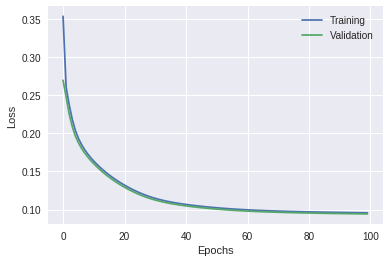

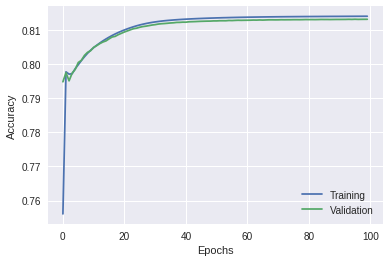

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_history(network_history):
    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.plot(network_history.history['loss'])
    plt.plot(network_history.history['val_loss'])
    plt.legend(['Training', 'Validation'])

    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.plot(network_history.history['acc'])
    plt.plot(network_history.history['val_acc'])
    plt.legend(['Training', 'Validation'], loc='lower right')
    plt.show()

plot_history(autoencoder_history)# use Matplotlib (don't ask)

### Reconstructing the test images

In [9]:
reconstructed_imgs = autoencoder.predict(x_test_reshape)
print "Shape of reconstructed images = ", reconstructed_imgs.shape

Shape of reconstructed images =  (10000, 784)


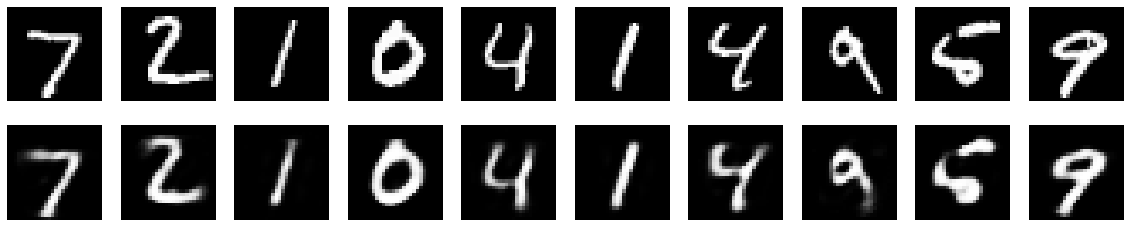

In [10]:
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(reconstructed_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()